In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
import os
import sys
import pathlib
HERE = pathlib.Path(os.getcwd()).parent.resolve()
sys.path.append(str(HERE/"src"))
from lts import LTSCell

In [37]:
url = 'http://api.scraperlink.com/investpy/?email=your@email.com&type=historical_data&product=cryptos&symbol=BTC&from_date=10/01/2013&to_date=2/1/2024'
response = requests.request('GET', url)
prices = response.json()['data']
data = pd.DataFrame(prices)

In [38]:
data.head()

,direction_color,rowDate,rowDateRaw,rowDateTimestamp,last_close,last_open,last_max,last_min,volume,volumeRaw,change_precent,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw,change_precentRaw
0,redFont,"Jan 10, 2024",1704844800,2024-01-10T00:00:00Z,"45,953.5","46,112.0","46,244.5","45,642.1",96.39K,96389,-0.38,45953.52734375000000,46111.98046875000000,46244.49609375000000,45642.14453125000000,-0.380336
1,redFont,"Jan 09, 2024",1704758400,2024-01-09T00:00:00Z,"46,129.0","46,959.2","47,880.1","45,333.9",100.09K,100093,-1.77,46128.97265625000000,46959.17578125000000,47880.05468750000000,45333.91406250000000,-1.774282
2,greenFont,"Jan 08, 2024",1704672000,2024-01-08T00:00:00Z,"46,962.2","43,934.2","47,196.7","43,251.0",103.09K,103085,6.91,46962.21484375000000,43934.17968750000000,47196.66796875000000,43251.02343750000000,6.908928
3,redFont,"Jan 07, 2024",1704585600,2024-01-07T00:00:00Z,"43,927.3","43,973.5","44,481.2","43,627.9",29.53K,29525,-0.09,43927.30859375000000,43973.49218750000000,44481.15625000000000,43627.85937500000000,-0.092246
4,redFont,"Jan 06, 2024",1704499200,2024-01-06T00:00:00Z,"43,967.9","44,156.6","44,203.2","43,424.0",24.26K,24257,-0.43,43967.86718750000000,44156.64062500000000,44203.21875000000000,43424.03906250000000,-0.428037


In [39]:
# Remove unnecessary columns
data.drop(columns=[
  'direction_color',
  'rowDateRaw',
  'rowDateTimestamp',

  # Quantity of btc bought or sold
  'volume',
  'volumeRaw',
  'change_precent',
  'change_precentRaw',
  'last_close',
  'last_open',
  'last_max',
  'last_min'
  ],
  inplace=True
)

data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,"Jan 10, 2024",45953.52734375000000,46111.98046875000000,46244.49609375000000,45642.14453125000000
1,"Jan 09, 2024",46128.97265625000000,46959.17578125000000,47880.05468750000000,45333.91406250000000
2,"Jan 08, 2024",46962.21484375000000,43934.17968750000000,47196.66796875000000,43251.02343750000000
3,"Jan 07, 2024",43927.30859375000000,43973.49218750000000,44481.15625000000000,43627.85937500000000
4,"Jan 06, 2024",43967.86718750000000,44156.64062500000000,44203.21875000000000,43424.03906250000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3754 entries, 0 to 3753
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rowDate        3754 non-null   object
 1   last_closeRaw  3754 non-null   object
 2   last_openRaw   3754 non-null   object
 3   last_maxRaw    3754 non-null   object
 4   last_minRaw    3754 non-null   object
dtypes: object(5)
memory usage: 146.8+ KB


In [41]:
data.isnull().sum()

rowDate          0
last_closeRaw    0
last_openRaw     0
last_maxRaw      0
last_minRaw      0
dtype: int64

In [42]:
# Convert date object to datetime
data['rowDate'] = pd.to_datetime(data['rowDate'])

# Convert values to floats
data = data.astype({
    'last_closeRaw': 'float',
    'last_openRaw': 'float',
    'last_maxRaw': 'float',
    'last_minRaw': 'float'
})

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3754 entries, 0 to 3753
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rowDate        3754 non-null   datetime64[ns]
 1   last_closeRaw  3754 non-null   float64       
 2   last_openRaw   3754 non-null   float64       
 3   last_maxRaw    3754 non-null   float64       
 4   last_minRaw    3754 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 146.8 KB


In [44]:
data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,2024-01-10,45953.527344,46111.980469,46244.496094,45642.144531
1,2024-01-09,46128.972656,46959.175781,47880.054688,45333.914062
2,2024-01-08,46962.214844,43934.179688,47196.667969,43251.023438
3,2024-01-07,43927.308594,43973.492188,44481.156250,43627.859375
4,2024-01-06,43967.867188,44156.640625,44203.218750,43424.039062


In [45]:
data.rename(
    columns={
        'last_closeRaw': 'close',
        'last_openRaw': 'open',
        'last_maxRaw': 'high',
        'last_minRaw': 'low',
        'rowDate': 'Date'
    },
    inplace=True
)

In [46]:
data.head()

,Date,close,open,high,low
0,2024-01-10,45953.527344,46111.980469,46244.496094,45642.144531
1,2024-01-09,46128.972656,46959.175781,47880.054688,45333.914062
2,2024-01-08,46962.214844,43934.179688,47196.667969,43251.023438
3,2024-01-07,43927.308594,43973.492188,44481.156250,43627.859375
4,2024-01-06,43967.867188,44156.640625,44203.218750,43424.039062


In [47]:
data.set_index('Date', inplace=True)

In [48]:
btc_prices = pd.DataFrame(data['close']).rename(columns={ 'close': 'Price' })

In [49]:
btc_prices.head()

,Price
Date,
2024-01-10,45953.527344
2024-01-09,46128.972656
2024-01-08,46962.214844
2024-01-07,43927.308594
2024-01-06,43967.867188


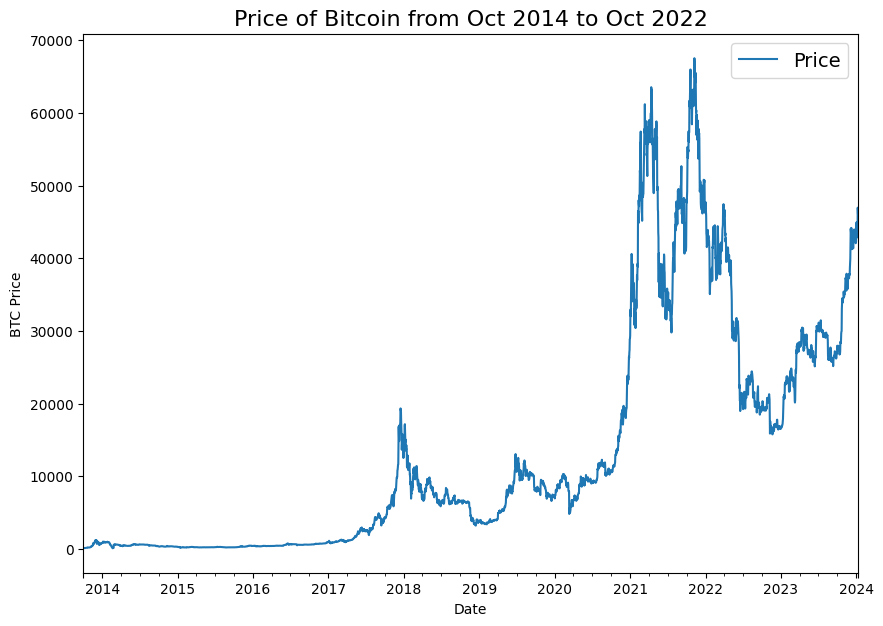

In [50]:
# Visualize closing prices
import matplotlib.pyplot as plt

btc_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from Oct 2014 to Oct 2022', fontsize=16)
plt.legend(fontsize=14);

In [51]:
# Sort ascending order of prices
btc_prices.sort_values('Date', inplace=True)
btc_prices.head()

,Price
Date,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,130.990005
2013-10-04,136.820007
2013-10-05,136.699997


In [52]:
timesteps = btc_prices.index.to_numpy()
prices = btc_prices['Price'].to_numpy()

In [53]:
timesteps, prices

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', ...,
        '2024-01-08T00:00:00.000000000', '2024-01-09T00:00:00.000000000',
        '2024-01-10T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([  140.30000305,   123.        ,   130.99000549, ...,
        46962.21484375, 46128.97265625, 45953.52734375]))

In [54]:
# Create sequential splits at a specified point (80% train, 20% test)
split_size = int(.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3003,), (751,), (3003,), (751,))

In [55]:
# Create a helper plotting function
def plot_time_series(timesteps, prices, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], prices[start:end], format, label=label)
    plt.xlabel('Date')
    plt.ylabel('Price')
    if label:
        plt.legend(fontsize=14)

    # Display a grid for easier measurement readings
    plt.grid(True)

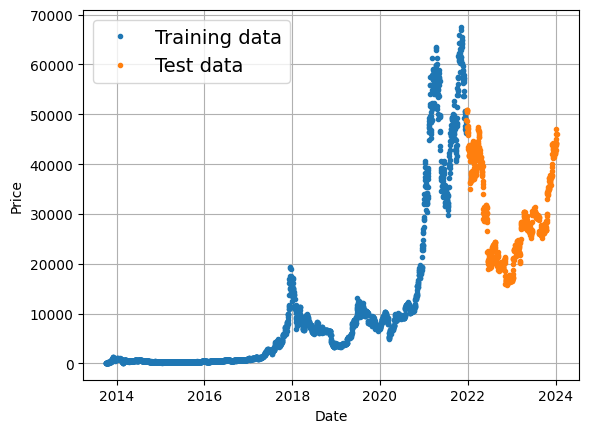

In [56]:
plot_time_series(X_train, y_train, label='Training data')
plot_time_series(X_test, y_test, label='Test data')

### Create windowed train & test sets

**Phase 01 - Horizon 1; Window 7**

In [57]:
# predict 1 step at a time
HORIZON = 1

# use a week worth of timesteps to predict the horizon
WINDOW_SIZE = 7

In [58]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [59]:
# Create a function to make windows across entire time series
def make_windows(x, window_size=7, horizon=1):
    # Create a window of specific window_size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    
    # Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    
    windowed_array = x[window_indexes]
    
    windows, labels = get_labelled_windows(windowed_array, horizon)
    return windows, labels

In [60]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

In [61]:
full_windows, full_labels

(array([[  140.30000305,   123.        ,   130.99000549, ...,
           136.69999695,   137.80000305,   135.80000305],
        [  123.        ,   130.99000549,   136.82000732, ...,
           137.80000305,   135.80000305,   136.49000549],
        [  130.99000549,   136.82000732,   136.69999695, ...,
           135.80000305,   136.49000549,   139.5       ],
        ...,
        [44183.375     , 44943.71875   , 42836.125     , ...,
         44156.875     , 43967.8671875 , 43927.30859375],
        [44943.71875   , 42836.125     , 44157.03515625, ...,
         43967.8671875 , 43927.30859375, 46962.21484375],
        [42836.125     , 44157.03515625, 44156.875     , ...,
         43927.30859375, 46962.21484375, 46128.97265625]]),
 array([[  136.49000549],
        [  139.5       ],
        [  140.41000366],
        ...,
        [46962.21484375],
        [46128.97265625],
        [45953.52734375]]))

In [62]:
def make_train_test_splits(windows, labels, test_split=.2):
    split_size = int(len(windows) * (1 - test_split)) # 80%
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [63]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2997, 750, 2997, 750)

### Attempt model training

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    
    # Expand dimensions to align with required input shape
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

2024-01-10 11:17:08.774326: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 rnn (RNN)                   (1, 32)                   5072      
                                                                 
 dense (Dense)               (1, 1)                    33        
                                                                 
Total params: 5,105
Trainable params: 5,105
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(
        learning_rate = .01,
        clipvalue=.5
    ),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

history_1 = model.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
94/94 [==============================] - 18s 77ms/step - loss: 8704.7285 - mae: 8704.7285 - mse: 269024640.0000
Epoch 2/10
94/94 [==============================] - 7s 71ms/step - loss: 8619.8135 - mae: 8619.8135 - mse: 253657600.0000
Epoch 3/10
94/94 [==============================] - 7s 72ms/step - loss: 8632.8535 - mae: 8632.8535 - mse: 258885760.0000
Epoch 4/10
94/94 [==============================] - 7s 75ms/step - loss: 8615.0527 - mae: 8615.0527 - mse: 256654736.0000
Epoch 5/10
94/94 [==============================] - 7s 73ms/step - loss: 8616.6982 - mae: 8616.6982 - mse: 255972032.0000
Epoch 6/10
94/94 [==============================] - 7s 71ms/step - loss: 8621.2793 - mae: 8621.2793 - mse: 255528496.0000
Epoch 7/10
94/94 [==============================] - 7s 70ms/step - loss: 8614.4590 - mae: 8614.4590 - mse: 255942064.0000
Epoch 8/10
94/94 [==============================] - 7s 70ms/step - loss: 8620.2725 - mae: 8620.2725 - mse: 257842528.0000
Epoch 9/10
94/94 [=====

Gradient explosion occurs - Add LSTM layer

### Experiments
train for less number of epochs for faster experimentation

**Model 2 - LTS, LSTM - activation tanh**

In [67]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

2024-01-10 11:18:28.501807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-10 11:18:28.502874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-10 11:18:28.503627: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [68]:
model_2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [69]:
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10


2024-01-10 11:18:28.781170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-10 11:18:28.782269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-10 11:18:28.783175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

94/94 [==============================] - 46s 370ms/step - loss: 9423.5439 - mae: 9423.5439 - mse: 313265376.0000
Epoch 2/10
94/94 [==============================] - 34s 359ms/step - loss: 9375.8008 - mae: 9375.8008 - mse: 312365472.0000
Epoch 3/10
94/94 [==============================] - 35s 369ms/step - loss: 9328.2793 - mae: 9328.2793 - mse: 311456928.0000
Epoch 4/10
94/94 [==============================] - 33s 355ms/step - loss: 9281.2471 - mae: 9281.2471 - mse: 310592032.0000
Epoch 5/10
94/94 [==============================] - 37s 395ms/step - loss: 9235.2461 - mae: 9235.2461 - mse: 309715232.0000
Epoch 6/10
94/94 [==============================] - 35s 376ms/step - loss: 9196.1279 - mae: 9196.1279 - mse: 308911328.0000
Epoch 7/10
94/94 [==============================] - 36s 384ms/step - loss: 9163.9355 - mae: 9163.9355 - mse: 308179296.0000
Epoch 8/10
94/94 [==============================] - 35s 372ms/step - loss: 9134.3115 - mae: 9134.3115 - mse: 307462624.0000
Epoch 9/10
94/94 [=

**Model 2 - LTS, LSTM - activation relu**

In [70]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [71]:
model_3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [72]:
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
94/94 [==============================] - 48s 392ms/step - loss: 8798.1250 - mae: 8798.1250 - mse: 271656160.0000
Epoch 2/10
94/94 [==============================] - 37s 397ms/step - loss: 8717.4414 - mae: 8717.4414 - mse: 266183024.0000
Epoch 3/10
94/94 [==============================] - 37s 395ms/step - loss: 8658.1211 - mae: 8658.1211 - mse: 260722848.0000
Epoch 4/10
94/94 [==============================] - 38s 401ms/step - loss: 8641.7715 - mae: 8641.7715 - mse: 257096544.0000
Epoch 5/10
94/94 [==============================] - 36s 377ms/step - loss: 8724.9004 - mae: 8724.9004 - mse: 268398544.0000
Epoch 6/10
94/94 [==============================] - 36s 384ms/step - loss: 8648.5439 - mae: 8648.5439 - mse: 261233168.0000
Epoch 7/10
94/94 [==============================] - 35s 372ms/step - loss: 8642.1924 - mae: 8642.1924 - mse: 258418240.0000
Epoch 8/10
94/94 [==============================] - 36s 385ms/step - loss: 8670.3672 - mae: 8670.3672 - mse: 261387552.0000
Epoch 9/

LSTM with ReLU activation performs better - moving forward with ReLU

**Model 3 - Two LTS layers, LSTM**

In [73]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [74]:
model_4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [75]:
history_4 = model_4.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10


94/94 [==============================] - 79s 601ms/step - loss: 8757.2900 - mae: 8757.2900 - mse: 271625888.0000
Epoch 2/10
94/94 [==============================] - 58s 613ms/step - loss: 8691.5752 - mae: 8691.5752 - mse: 266735472.0000
Epoch 3/10
94/94 [==============================] - 57s 602ms/step - loss: 8774.4414 - mae: 8774.4414 - mse: 271326016.0000
Epoch 4/10
94/94 [==============================] - 58s 616ms/step - loss: 8746.8496 - mae: 8746.8496 - mse: 272261088.0000
Epoch 5/10
94/94 [==============================] - 57s 604ms/step - loss: 8746.7656 - mae: 8746.7656 - mse: 269835104.0000
Epoch 6/10
94/94 [==============================] - 57s 603ms/step - loss: 8671.0889 - mae: 8671.0889 - mse: 264139488.0000
Epoch 7/10
94/94 [==============================] - 57s 608ms/step - loss: 8782.3682 - mae: 8782.3682 - mse: 271057184.0000
Epoch 8/10
94/94 [==============================] - 57s 608ms/step - loss: 8733.8662 - mae: 8733.8662 - mse: 268730976.0000
Epoch 9/10
94/94 [=

Seems like more LTC cells do not make a difference

**Model 4 - LTS, Two LSTM layers**

In [76]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu', time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [77]:
model_5.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [78]:
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10


94/94 [==============================] - 50s 403ms/step - loss: 9136.7012 - mae: 9136.7012 - mse: 289707520.0000
Epoch 2/10
94/94 [==============================] - 37s 397ms/step - loss: 8737.9014 - mae: 8737.9014 - mse: 273011744.0000
Epoch 3/10
94/94 [==============================] - 38s 405ms/step - loss: 8780.7695 - mae: 8780.7695 - mse: 272774912.0000
Epoch 4/10
94/94 [==============================] - 38s 407ms/step - loss: 8796.5156 - mae: 8796.5156 - mse: 274180384.0000
Epoch 5/10
94/94 [==============================] - 37s 392ms/step - loss: 8757.5664 - mae: 8757.5664 - mse: 270298080.0000
Epoch 6/10
94/94 [==============================] - 38s 404ms/step - loss: 8735.3008 - mae: 8735.3008 - mse: 269210816.0000
Epoch 7/10
94/94 [==============================] - 37s 397ms/step - loss: 8723.7900 - mae: 8723.7900 - mse: 266266288.0000
Epoch 8/10
94/94 [==============================] - 39s 409ms/step - loss: 8833.8379 - mae: 8833.8379 - mse: 270480160.0000
Epoch 9/10
94/94 [=

More LSTM layers do not make a difference either

**Model 5 - Two LTS layers, Two LSTM layers**

In [79]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.RNN(LTSCell(128), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu', time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [80]:
model_6.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [81]:
history_6 = model_6.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10


94/94 [==============================] - 83s 638ms/step - loss: 9238.2412 - mae: 9238.2412 - mse: 286804064.0000
Epoch 2/10
94/94 [==============================] - 57s 607ms/step - loss: 8776.6611 - mae: 8776.6611 - mse: 271949728.0000
Epoch 3/10
94/94 [==============================] - 56s 598ms/step - loss: 8703.7002 - mae: 8703.7002 - mse: 264642240.0000
Epoch 4/10
94/94 [==============================] - 56s 590ms/step - loss: 8659.3115 - mae: 8659.3115 - mse: 264802944.0000
Epoch 5/10
94/94 [==============================] - 55s 586ms/step - loss: 8621.4580 - mae: 8621.4580 - mse: 260763632.0000
Epoch 6/10
94/94 [==============================] - 56s 597ms/step - loss: 8847.0908 - mae: 8847.0908 - mse: 271711584.0000
Epoch 7/10
94/94 [==============================] - 57s 609ms/step - loss: 8756.4346 - mae: 8756.4346 - mse: 269822368.0000
Epoch 8/10
94/94 [==============================] - 56s 599ms/step - loss: 8700.5342 - mae: 8700.5342 - mse: 267346928.0000
Epoch 9/10
94/94 [=

More  of both layers do not make a difference either - return to base

### Tune hyperparameters

Epochs and learning rate can be tuned by keras callbacks. Therefore, only batch size, optimization function, and hidden units are required to tune

**Update hidden units (multiples of 32 are preferred)**

In [82]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [83]:
model_7.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [84]:
history_7 = model_7.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10


94/94 [==============================] - 33s 236ms/step - loss: 8870.0869 - mae: 8870.0869 - mse: 280119392.0000
Epoch 2/10
94/94 [==============================] - 22s 233ms/step - loss: 8759.5947 - mae: 8759.5947 - mse: 271304832.0000
Epoch 3/10
94/94 [==============================] - 22s 232ms/step - loss: 8794.3232 - mae: 8794.3232 - mse: 267001232.0000
Epoch 4/10
94/94 [==============================] - 23s 244ms/step - loss: 8692.3057 - mae: 8692.3057 - mse: 265429936.0000
Epoch 5/10
94/94 [==============================] - 22s 234ms/step - loss: 8778.4766 - mae: 8778.4766 - mse: 270227680.0000
Epoch 6/10
94/94 [==============================] - 22s 236ms/step - loss: 8728.3916 - mae: 8728.3916 - mse: 266612688.0000
Epoch 7/10
94/94 [==============================] - 23s 244ms/step - loss: 8684.0850 - mae: 8684.0850 - mse: 265715024.0000
Epoch 8/10
94/94 [==============================] - 23s 240ms/step - loss: 8734.0830 - mae: 8734.0830 - mse: 263209088.0000
Epoch 9/10
94/94 [=

128 and 32 is very similar - moving forward with 32 as it trains faster

**Update batch size**

In [85]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [86]:
model_8.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [87]:
history_8 = model_8.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=10,
)

Epoch 1/10


24/24 [==============================] - 23s 490ms/step - loss: 8915.4561 - mae: 8915.4561 - mse: 280013472.0000
Epoch 2/10
24/24 [==============================] - 11s 456ms/step - loss: 8788.8506 - mae: 8788.8506 - mse: 273548608.0000
Epoch 3/10
24/24 [==============================] - 11s 457ms/step - loss: 8781.7549 - mae: 8781.7549 - mse: 270922144.0000
Epoch 4/10
24/24 [==============================] - 11s 455ms/step - loss: 8767.5762 - mae: 8767.5762 - mse: 267808496.0000
Epoch 5/10
24/24 [==============================] - 12s 505ms/step - loss: 8779.6006 - mae: 8779.6006 - mse: 268557408.0000
Epoch 6/10
24/24 [==============================] - 11s 477ms/step - loss: 8792.9102 - mae: 8792.9102 - mse: 270180320.0000
Epoch 7/10
24/24 [==============================] - 11s 458ms/step - loss: 8763.6787 - mae: 8763.6787 - mse: 268922624.0000
Epoch 8/10
24/24 [==============================] - 11s 472ms/step - loss: 8742.6777 - mae: 8742.6777 - mse: 272094752.0000
Epoch 9/10
24/24 [=

Issues with batch size 128, default 32 is better

**Update window size**

In [88]:
HORIZON = 1
WINDOW_SIZE = 30

In [89]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2979, 745, 2979, 745)

In [90]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

In [91]:
model_9.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [92]:
history_9 = model_9.fit(
    train_windows,
    train_labels,
    epochs=10,
)

Epoch 1/10
94/94 [==============================] - 34s 236ms/step - loss: 8849.9492 - mae: 8849.9492 - mse: 273177600.0000
Epoch 2/10
94/94 [==============================] - 22s 232ms/step - loss: 8895.1523 - mae: 8895.1523 - mse: 275634592.0000
Epoch 3/10
94/94 [==============================] - 22s 236ms/step - loss: 8886.9424 - mae: 8886.9424 - mse: 272756192.0000
Epoch 4/10
94/94 [==============================] - 22s 237ms/step - loss: 8885.2842 - mae: 8885.2842 - mse: 274871392.0000
Epoch 5/10
94/94 [==============================] - 22s 230ms/step - loss: 8882.8838 - mae: 8882.8838 - mse: 270206880.0000
Epoch 6/10
94/94 [==============================] - 22s 236ms/step - loss: 8855.9277 - mae: 8855.9277 - mse: 271358080.0000
Epoch 7/10
94/94 [==============================] - 21s 227ms/step - loss: 8909.4473 - mae: 8909.4473 - mse: 274931424.0000
Epoch 8/10
94/94 [==============================] - 21s 229ms/step - loss: 8811.2812 - mae: 8811.2812 - mse: 271187232.0000
Epoch 9/

Window size of 7 is better

### Complete training

**Create callback functions**

In [93]:
# Model checkpoint with a specific filename
def create_model_checkpoint(model_name, save_path='model_checkpoints', monitor_dataset_loss=False):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True,
        monitor='loss' if monitor_dataset_loss else 'val_loss',
    )

# Create a tensorboard callback
def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
    )

    print(f'Saving TensorBoard log files to: {log_dir}')
    return tensorboard_callback

# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=200,
    restore_best_weights=True
)

# create reduce lr on plateau callback
reduce_lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(
    patience=100,
    verbose=1
)

In [94]:
HORIZON = 1
WINDOW_SIZE = 7

In [95]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2997, 750, 2997, 750)

In [96]:
model_10 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(WINDOW_SIZE)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.RNN(LTSCell(32), time_major=True, return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
], name='model_10')

In [97]:
model_10.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
    loss = tf.keras.losses.MAE,
    metrics = ['mae', 'mse']
)

In [98]:
history_10 = model_10.fit(
    train_windows,
    train_labels,
    epochs=5000,
    callbacks=[
        create_model_checkpoint(model_name=model_10.name),
        create_tensorboard_callback(
            dir_name='tensorboard_logs/tensorboard_logs_model_10',
            experiment_name='model_10'
        ),
        early_stopping,
        reduce_lr_plateau,
        
    ]
)

NameError: name 'datetime' is not defined